In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'MNIST'

In [3]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))


Using TensorFlow backend.


Dataset size (70000, 28, 28)


# VAE

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from utils.constants import Models as models
from models.AE import AE


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [6]:
ae = AE(model_type=models.VAE, dataset_name=dataset_name,hidden_dim=500, plot=True, isConv=True)

Loading previous configuration ...
Saving Model Arguments ...
building VAE graph ... 
Instructions for updating:
Colocations handled automatically by placer.

[*] Defining encoders...
Instructions for updating:
Use keras.layers.conv2d instead.
[*] Layer ( encoder_mean/enmean__conv_1/Relu:0 ) output shape: [64, 14, 14, 32]
Instructions for updating:
Use keras.layers.batch_normalization instead.
[*] Layer ( encoder_mean/enmean__conv_2/Relu:0 ) output shape: [64, 7, 7, 32]
[*] Layer ( encoder_mean/enmean__conv_3/Relu:0 ) output shape: [64, 4, 4, 32]
[*] Layer ( encoder_mean/enmean__conv_4/Relu:0 ) output shape: [64, 2, 2, 32]
[*] Layer ( encoder_mean/enmean__conv_5/Relu:0 ) output shape: [64, 1, 1, 32]
Instructions for updating:
Use keras.layers.flatten instead.

Instructions for updating:
Use keras.layers.dense instead.
[*] Layer ( encoder_mean/enmean_dense_1/Relu:0 ) output shape: [64, 500]
Instructions for updating:
Use keras.layers.dropout instead.
[*] Layer ( encoder_mean/enmean_dens

In [7]:
ae.fit(X,y)


Processing data...
Scaling dataset ... 
Creating dask array ... 
Preparing samples ...


Mixture of types in 'arrays'. Falling back to scikit-learn.


Training dataset shape:  (56000, 28, 28, 3)
Validation dataset shape:  (14000, 28, 28, 3)
Sample dataset shape:  (200, 28, 28, 3)

Training a model...
Loading model checkpoint experiments/checkpoint_dir/VAE_Conv_MNIST_lat15_h500_lay3/-104125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE_Conv_MNIST_lat15_h500_lay3/-104125
Model loaded
EPOCHS trained:  119
EPOCH:  119


 10%|████████▏                                                                        | 88/875 [00:17<02:34,  5.10it/s]

KeyboardInterrupt: 

In [8]:
imgs = ae.reconst_samples_out_data()

Loading model checkpoint experiments/checkpoint_dir/VAE_Conv_MNIST_lat15_h500_lay3/-104125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE_Conv_MNIST_lat15_h500_lay3/-104125
Model loaded
EPOCHS trained:  119
random sample batch ...


In [10]:
import matplotlib.pyplot as plt

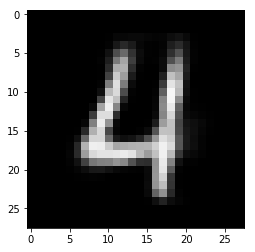

In [12]:
plt.imshow(imgs[10])